## Clustering
Clustering in ML refers to the process of grouping a set of objects in such a way that objects in the same group (or cluster) are more similar to each other than to those in other groups. It is an **unsupervised learning** technique used to discover **inherent patterns** or **groupings** in a dataset without any prior knowledge of the groups. Clustering algorithms aim to find the natural structure in the data, often by measuring the similarity or dissimilarity between data points and grouping them accordingly.

## K-Means
K-Means is a popular clustering algorithm used in machine learning for partitioning a dataset into K distinct, non-overlapping clusters. The algorithm works iteratively to assign each data point to one of the K clusters based on the features provided. The goal is to minimize the sum of squared distances between data points and their respective cluster centroids

**Data :-** The data point is assigned to its nearest centroid based on the **squared Euclidean distance**. Let us assume a Cluster with c as centroid and a data point x is assigned to this cluster, based on the distance between c,x. There are some other distance measures like **Manhattan, Jaccard,** and **Cosine** which are used based on the appropriate type of data.

**Centroid Update :-** Centroids are recomputed by taking the mean of all data points assigned to a particular cluster..

1. Assume we have 4 data points A,B,C,D as shown below<br>
<img src="Images/KM1.png" width="200" height="50"><br>
2. Choose two centroids AB and CD by calculating the average of A,B and C,D<br>
<img src="Images/KM2.png" width="200" height="50"><br>
3. Calculate squared euclidean distance between all data points to the centroids AB, CD. For example distance between A(2,3) and AB (4,2) can be given by s = (2–4)² + (3–2)².<br>
<img src="Images/KM3.png" width="400" height="50"><br>
4. If we observe in the fig, the highlighted distance between (A, CD) is 4 and is less compared to (AB, A) which is 5. Since point A is close to the CD we can move A to CD cluster.<br>

5. There are two clusters formed so far, let recompute the centroids i.e, B, ACD similar to step 2, where ACD is average of A,C,D.<br>
<img src="Images/KM4.png" width="200" height="50"><br>
6. As we know K-Means is iterative procedure now we have to calculate the distance of all points (A, B, C, D) to new centroids (B, ACD) similar to step 3.<br>
<img src="Images/KM5.png" width="400" height="50"><br>
7. In the above table, we can see respective cluster values are minimum that A is too far from cluster B and near to cluster ACD. All data points are assigned to clusters (B, ACD) based on their minimum distance. The iterative procedure ends here.<br>

8. To conclude, we have started with two centroids and end up with two clusters, K=2.<br>


### Choosing K
One method of choosing value K is the **elbow method**. In this method we will run K-Means clustering for a range of K values lets say (K=1 to 10) and calculate the **Sum of Squared Error (SSE)**. SSE is calculated as the mean distance between data points and their cluster centroid.<br>
Then plot a line chart for SSE values for each K, if the line chart looks like an arm then the elbow on the arm is the value of K that is the best.<br>
<img src="Images/KM6.png" width="400" height="150"><br>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

def euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1-x2)**2))

**`euclidean_distance()`** function calculates the Euclidean distance between two vectors **x1** and **x2**. The Euclidean distance is a measure of the straight-line distance between two points in Euclidean space.

In [2]:
class KMeans:

    def __init__(self, K=5, max_iters=100, plot_steps=False):
        self.K = K
        self.max_iters = max_iters
        self.plot_steps = plot_steps

        # list of sample indices for each cluster
        self.clusters = [[] for _ in range(self.K)]

        # the centers (mean vector) for each cluster
        self.centroids = []


    def predict(self, X):
        self.X = X
        self.n_samples, self.n_features = X.shape

        # initialize
        random_sample_idxs = np.random.choice(self.n_samples, self.K, replace=False)
        self.centroids = [self.X[idx] for idx in random_sample_idxs]

        # optimize clusters
        for _ in range(self.max_iters):
            # assign samples to closest centroids (create clusters)
            self.clusters = self._create_clusters(self.centroids)

            if self.plot_steps:
                self.plot()

            # calculate new centroids from the clusters
            centroids_old = self.centroids
            self.centroids = self._get_centroids(self.clusters)

            if self._is_converged(centroids_old, self.centroids):
                break

            if self.plot_steps:
                self.plot()

        # classify samples as the index of their clusters
        return self._get_cluster_labels(self.clusters)


    def _get_cluster_labels(self, clusters):
        # each sample will get the label of the cluster it was assigned to
        labels = np.empty(self.n_samples)
        for cluster_idx, cluster in enumerate(clusters):
            for sample_idx in cluster:
                labels[sample_idx] = cluster_idx

        return labels


    def _create_clusters(self, centroids):
        # assign the samples to the closest centroids
        clusters = [[] for _ in range(self.K)]
        for idx, sample in enumerate(self.X):
            centroid_idx = self._closest_centroid(sample, centroids)
            clusters[centroid_idx].append(idx)
        return clusters

    def _closest_centroid(self, sample, centroids):
        # distance of the current sample to each centroid
        distances = [euclidean_distance(sample, point) for point in centroids]
        closest_idx = np.argmin(distances)
        return closest_idx


    def _get_centroids(self, clusters):
        # assign mean value of clusters to centroids
        centroids = np.zeros((self.K, self.n_features))
        for cluster_idx, cluster in enumerate(clusters):
            cluster_mean = np.mean(self.X[cluster], axis=0)
            centroids[cluster_idx] = cluster_mean
        return centroids

    def _is_converged(self, centroids_old, centroids):
        # distances between old and new centroids, for all centroids
        distances = [euclidean_distance(centroids_old[i], centroids[i]) for i in range(self.K)]
        return sum(distances) == 0

    def plot(self):
        fig, ax = plt.subplots(figsize=(12, 8))

        for i, index in enumerate(self.clusters):
            point = self.X[index].T
            ax.scatter(*point)

        for point in self.centroids:
            ax.scatter(*point, marker="x", color="black", linewidth=2)

        plt.show()

This class implements the KMeans clustering algorithm.<br>
The **`__init__()`** function is the constructor which initializes the KMeans object with parameters for the number of cluster **('K')**, maximum nuber of iterations **('max_iters')** and whether to plot intermediate steps **('plot_steps')**.<br>
The **`predict()`** method performs the KMeans clustering on the input data X and returns the cluster labels for each sample in the input data. It initializes the **centroids randomly**, assigns samples to the closest centroids, updates centroids based on the mean of samples in each cluster, and repeats these steps until convergence.<br>
The **`_get_cluster_labels()`** method assigns cluster labels to each sample based on the index of the cluster it was assigned to.<br>
The **`_create_clusters()`** method creates clusters by assigning each sample to the closest centroid.<br>
The **`_closest_centroid()`** method calculates the index of the closest centroid to a given sample based on Euclidean distance.<br>

The **`_get_centroids()`** method calculates the new centroids based on the mean of samples in each cluster.<br>
The **`_is_converged()`** method checks if the algorithm has converged by comparing the old and new centroids' distances.<br>
The **`plot()`** method plots the clusters and centroids for visualization purposes.<br>

(500, 2)
3


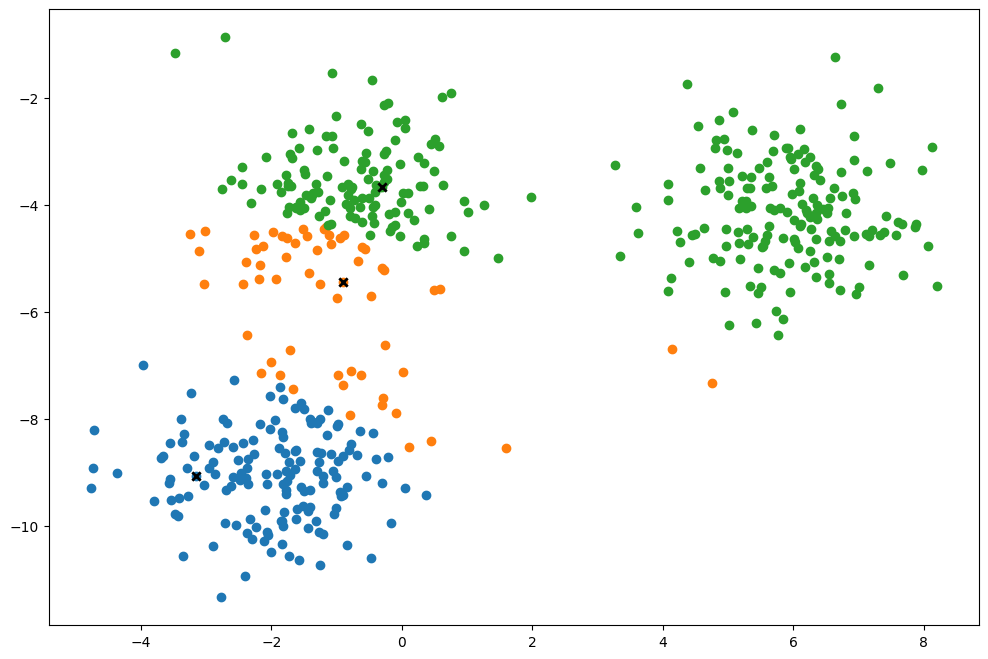

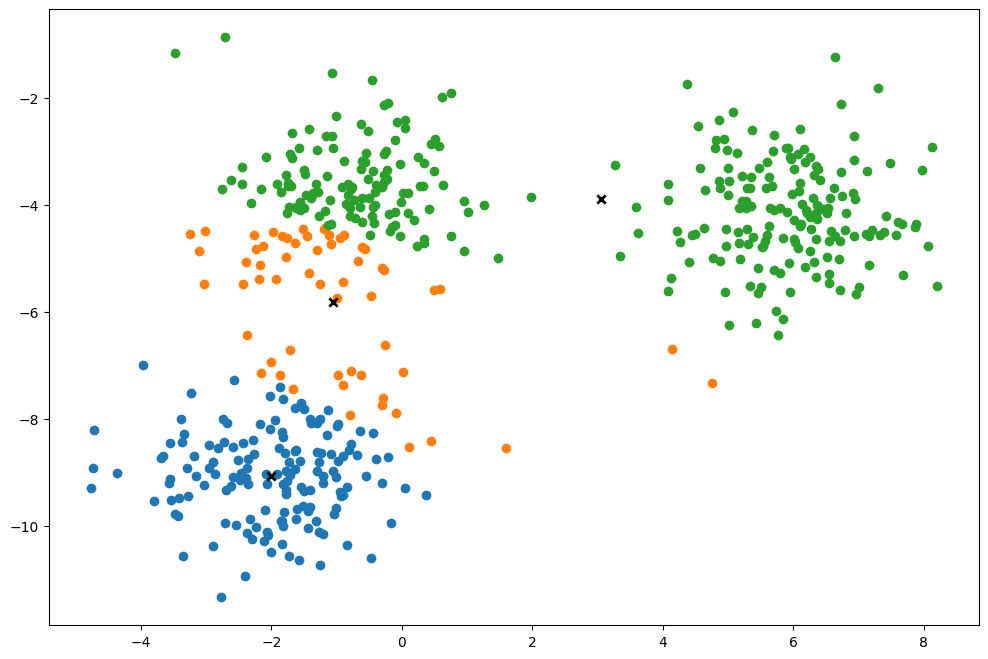

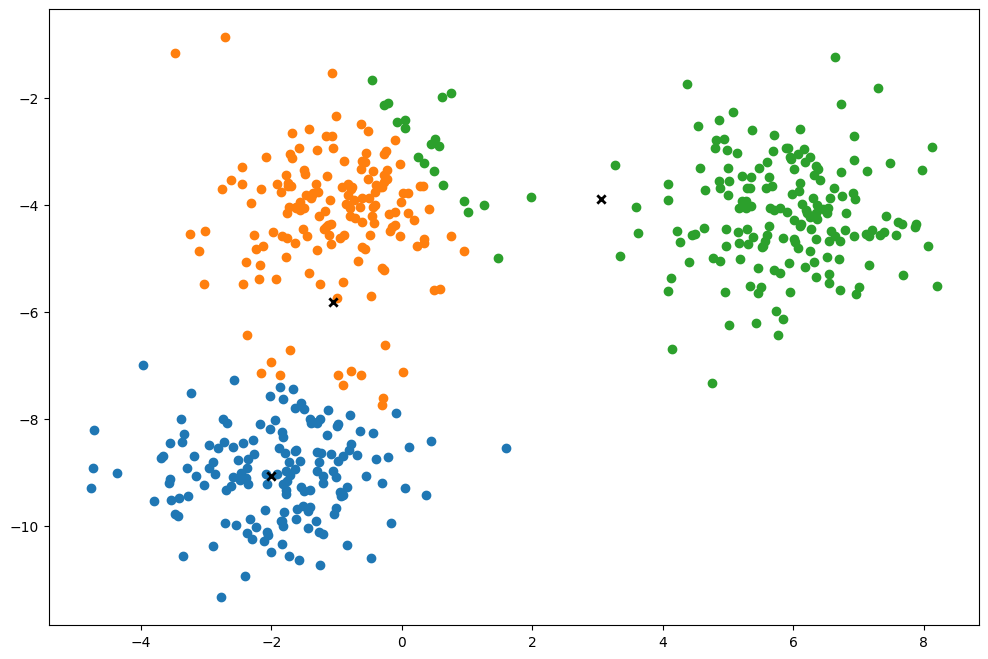

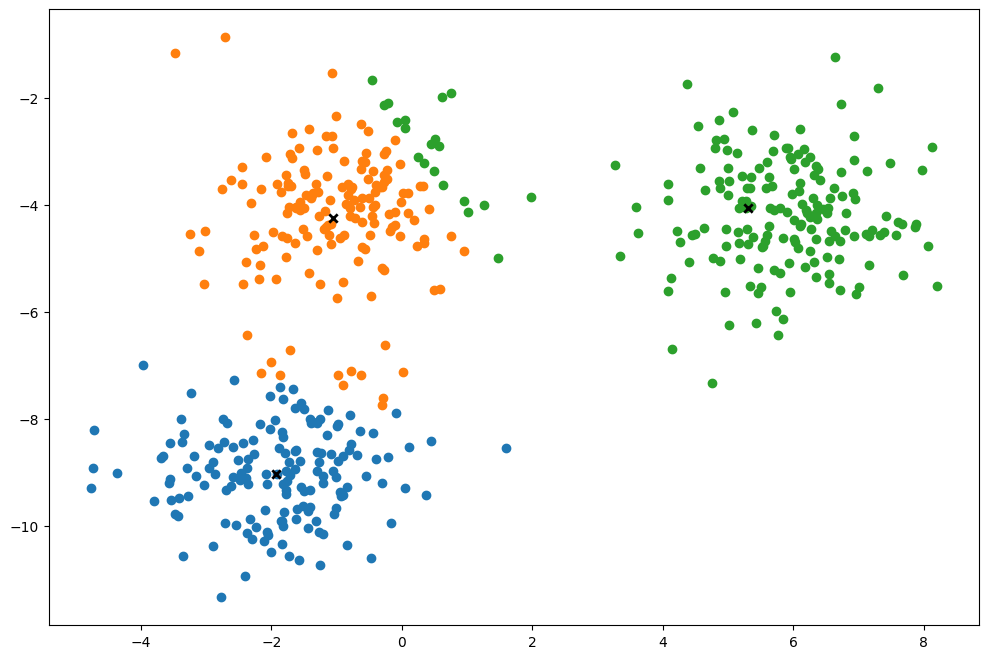

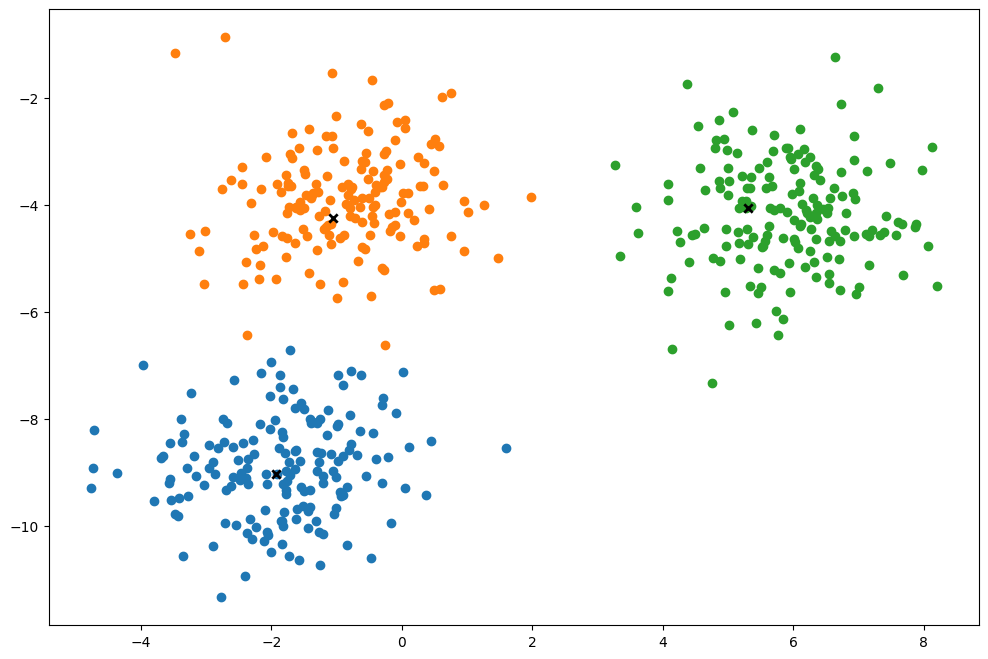

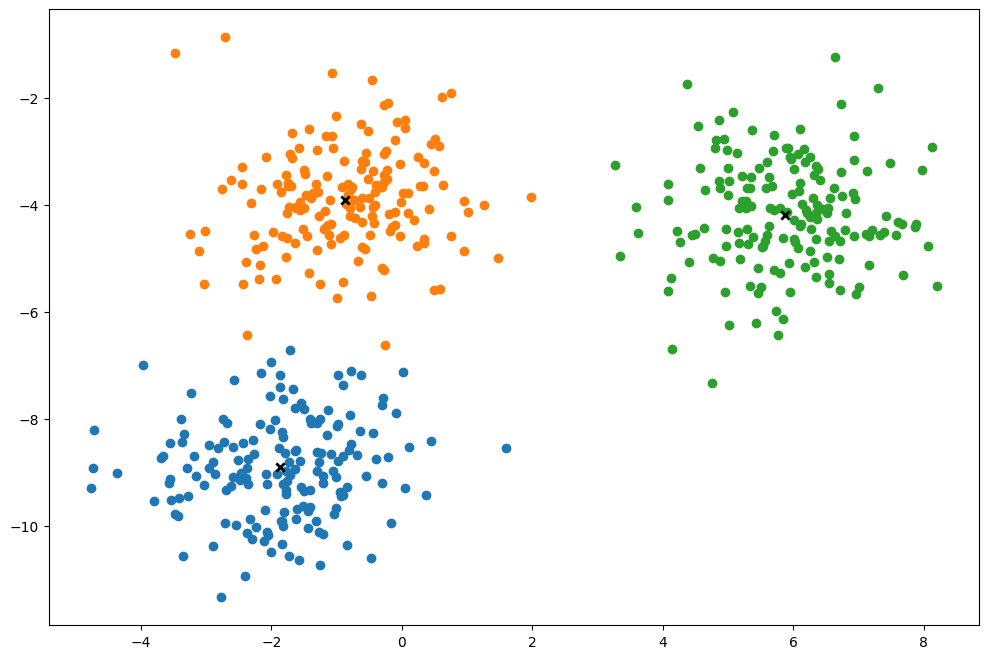

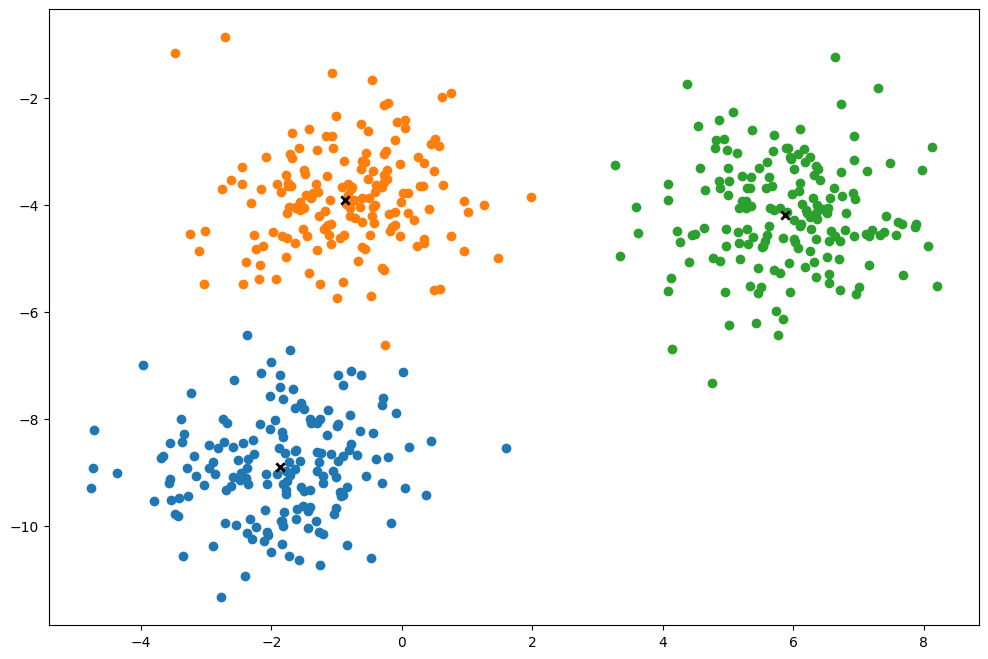

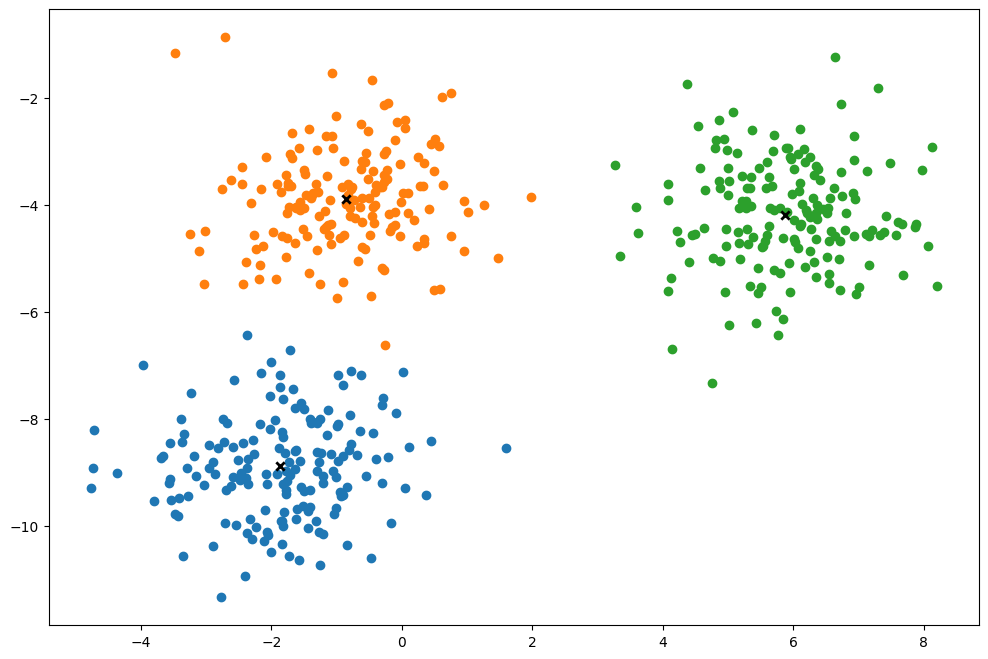

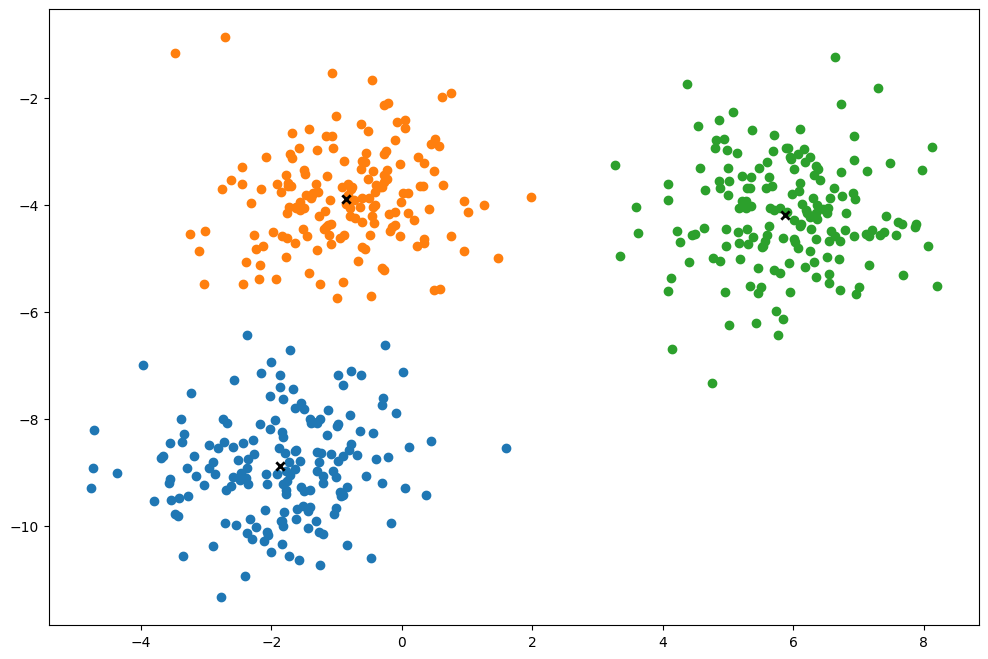

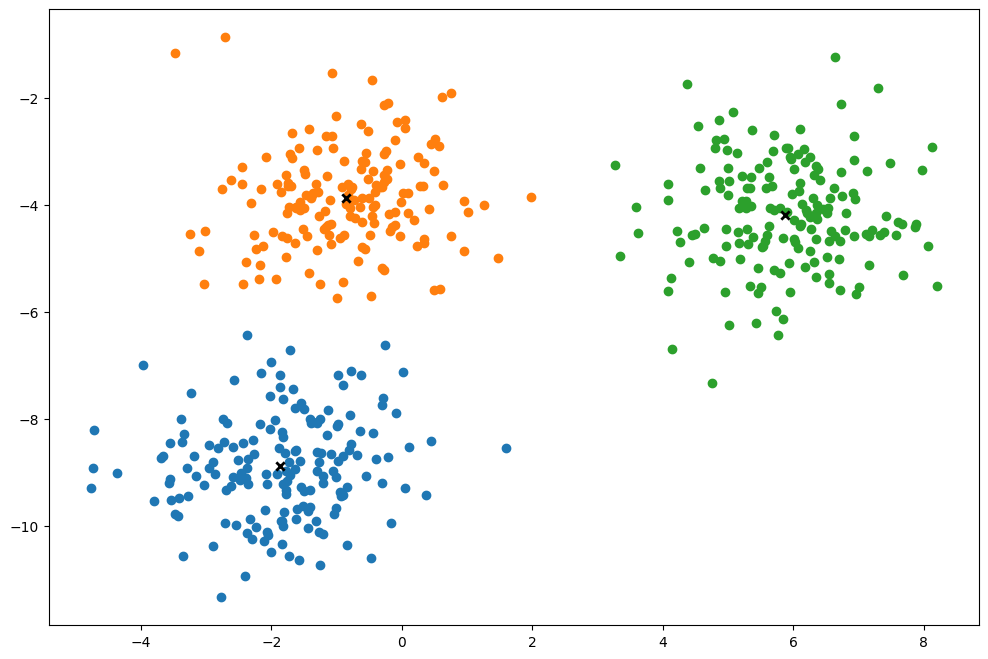

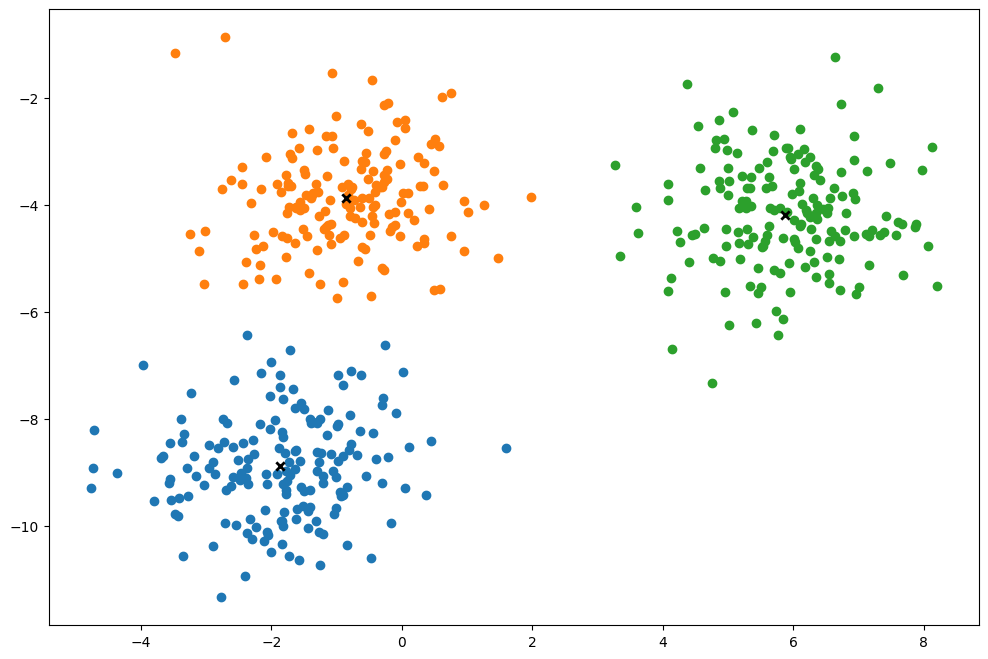

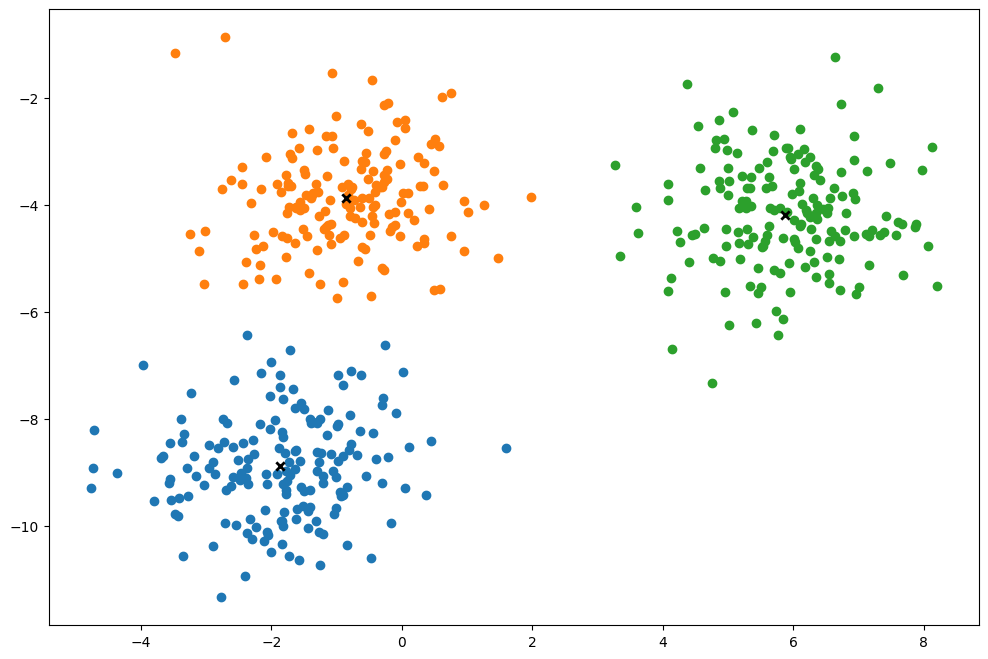

In [3]:
# Testing
if __name__ == "__main__":
    np.random.seed(42)

    X, y = make_blobs(centers=3, n_samples=500, n_features=2, shuffle=True, random_state=40)
    print(X.shape)

    clusters = len(np.unique(y))
    print(clusters)

    k = KMeans(K=clusters, max_iters=150, plot_steps=True)
    y_pred = k.predict(X)

    k.plot()

The **`if __name__ == "__main__":`** line ensures that the following code is only executed when the script is run directly, not when it is imported as a module.<br>
**`np.random.seed(42)`** sets the random seed to ensure reproducibility of results.<br>
The **`make_blobs()`** is a sklean function that creates clusters of points in a multi-dimensional space. Here it generates a synthetic dataset with 3 clusters **(centers=3)**, 500 samples **(n_samples=500)** and 2 features **(n_features=2)**<br>
**`clusters = len(np.unique(y))`** determines the number of clusters in the dataset by finding the number of unique labels in y.<br>
**`k = KMeans()`** creates an instance of the KMeans class with the number of clusters **(K)** set to the number of clusters in the dataset, **maximum iterations** set to 150, and **plot_steps** set to True to visualize the clustering process.<br>
**`y_pred = k.predict(X)`** uses the predict method of the KMeans object to cluster the data and assign cluster labels to each sample.<br>
And finally using **`k.plot()`** we plot the clusters and centroids for visualization.

## Using Sklearn Model

C:\Users\sayed\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


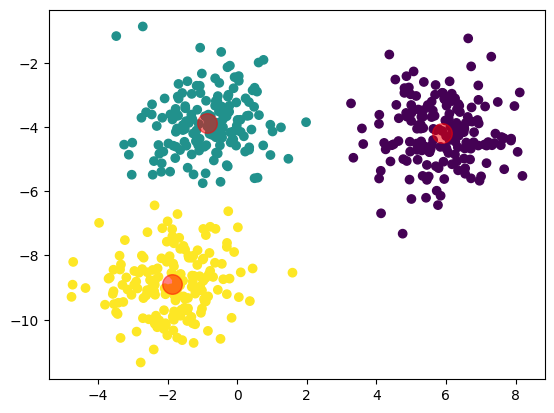

In [6]:
from sklearn.cluster import KMeans

k = KMeans(n_clusters=3, random_state=40)
k.fit(X)
y_kmeans = k.predict(X)

plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, cmap='viridis')
centers = k.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.5)
plt.show()

**Inertia** and **silhouette** scores are metrics used to evaluate the performance of clustering algorithms like KMeans.

**Inertia:** It measures how tightly clustered the points in a cluster are. Lower inertia indicates that the clusters are dense, which is generally better. However, the absolute value of inertia does not have a direct interpretation, and it is mainly used for comparing different models on the same dataset. Lower values of inertia are generally better, but the "goodness" of a value is relative to other models on the same dataset.<br>
**Silhouette Score:** It measures how similar an object is to its own cluster compared to other clusters. It ranges from -1 to 1, where a high value indicates that the object is well matched to its own cluster and poorly matched to neighboring clusters. A value close to 1 indicates that the clusters are well apart from each other and clearly distinguished, which is considered good. However, the silhouette score should be interpreted in the context of the specific dataset and problem.

In [8]:
inertia = k.inertia_
print("Inertia:", inertia)

Inertia: 974.195067375208


In [9]:
from sklearn.metrics import silhouette_score

silhouette_avg = silhouette_score(X, k.labels_)
print("Silhouette Score:", silhouette_avg)

Silhouette Score: 0.6837082573916827
